In [2]:
from utils import *
import numpy as np
import time
import torch
from valda.valuation import DataValuation

train_size = 1000
train_start = 0
train_size_batch = 200
dev_size = 100
test_size = 300
np.random.seed(0)
torch.manual_seed(0)

# Load data
X_train, y_train_clean, X_dev, y_dev, X_test, y_test = load_data(train_size, dev_size, test_size)
y_train, flip_indices = flip_labels(y_train_clean, flip_fraction=0.3)

# Create a batch of training data
X_train_batch = X_train[train_start:train_start+train_size_batch]
y_train_batch = y_train[train_start:train_start+train_size_batch]

# Define a DataValuation instance
dv = DataValuation(X_train_batch, y_train_batch, X_dev, y_dev)

Run with the default setting:
1. Logistic regression as the classifier
2. Prediction accuracy as the value measurement

In [2]:
start_time = time.time()
vals_loo = dv.estimate(method="loo")
end_time = time.time()
time_loo = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_loo))

100%|██████████| 200/200 [00:10<00:00, 19.15it/s]

Time elapsed: 10.45 seconds


In [4]:
start_time = time.time()
vals_tmc = dv.estimate(method="tmc-shapley")
end_time = time.time()
time_tmc = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_tmc))

100%|██████████| 500/500 [03:50<00:00,  2.17it/s]

Time elapsed: 230.94 seconds


In [5]:
start_time = time.time()
vals_beta = dv.estimate(method="beta-shapley")
end_time = time.time()
time_beta = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_beta))

100%|██████████| 50/50 [39:48<00:00, 47.77s/it]

Time elapsed: 2388.58 seconds


In [6]:
start_time = time.time()
vals_cs = dv.estimate(method="cs-shapley")
end_time = time.time()
time_cs = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_cs))

The number of training data with label 0 is 22
Labels on the other side: [1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:36<00:00,  5.16it/s]


score = 0.04
The number of training data with label 1 is 25
Labels on the other side: [0, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:39<00:00,  5.05it/s]


score = 0.14
The number of training data with label 2 is 22
Labels on the other side: [0, 1, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:25<00:00,  5.83it/s]


score = 0.04
The number of training data with label 3 is 17
Labels on the other side: [0, 1, 2, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:16<00:00,  6.57it/s]


score = 0.02
The number of training data with label 4 is 19
Labels on the other side: [0, 1, 2, 3, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:33<00:00,  5.36it/s]


score = 0.08
The number of training data with label 5 is 17
Labels on the other side: [0, 1, 2, 3, 4, 6, 7, 8, 9]


100%|██████████| 500/500 [01:22<00:00,  6.09it/s]


score = 0.02
The number of training data with label 6 is 24
Labels on the other side: [0, 1, 2, 3, 4, 5, 7, 8, 9]


100%|██████████| 500/500 [01:16<00:00,  6.54it/s]


score = 0.04
The number of training data with label 7 is 18
Labels on the other side: [0, 1, 2, 3, 4, 5, 6, 8, 9]


100%|██████████| 500/500 [01:23<00:00,  5.97it/s]


score = 0.04
The number of training data with label 8 is 16
Labels on the other side: [0, 1, 2, 3, 4, 5, 6, 7, 9]


100%|██████████| 500/500 [01:28<00:00,  5.66it/s]


score = 0.05
The number of training data with label 9 is 20
Labels on the other side: [0, 1, 2, 3, 4, 5, 6, 7, 8]


100%|██████████| 500/500 [01:23<00:00,  6.02it/s]

score = 0.02
Time elapsed: 864.96 seconds


Save vals and time

In [12]:
np.save('data/vals_loo.npy', vals_loo)
np.save('data/vals_tmc.npy', vals_tmc)
np.save('data/vals_beta.npy', vals_beta)
np.save('data/vals_cs.npy', vals_cs)
np.save('data/time_loo.npy', time_loo)
np.save('data/time_tmc.npy', time_tmc)
np.save('data/time_beta.npy', time_beta)
np.save('data/time_cs.npy', time_cs)

Load vals and time

In [7]:
vals_loo = np.load('data/vals_loo.npy', allow_pickle=True)
vals_tmc = np.load('data/vals_tmc.npy', allow_pickle=True)
vals_beta = np.load('data/vals_beta.npy', allow_pickle=True)
vals_cs = np.load('data/vals_cs.npy', allow_pickle=True)
time_loo = np.load('data/time_loo.npy', allow_pickle=True)
time_tmc = np.load('data/time_tmc.npy', allow_pickle=True)
time_beta = np.load('data/time_beta.npy', allow_pickle=True)
time_cs = np.load('data/time_cs.npy', allow_pickle=True)

# To dictionary
vals_loo = vals_loo.item()
vals_tmc = vals_tmc.item()
vals_beta = vals_beta.item()
vals_cs = vals_cs.item()

Create vals_rand dictionary

In [8]:
vals_rand = {}
for i in range(train_size_batch):
    vals_rand[i] = np.random.rand()

Plot the results

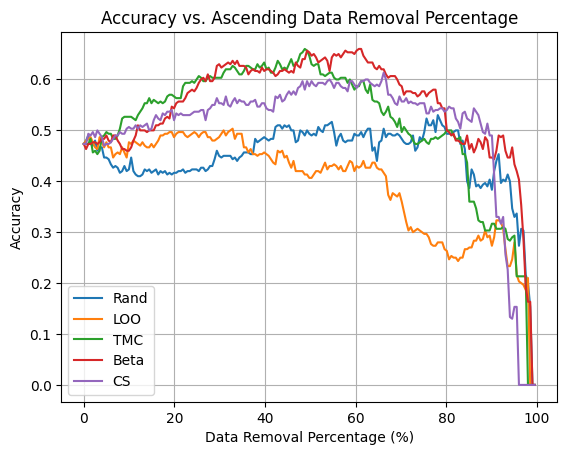

The weighted accuracy drop for Rand is 0.095
The weighted accuracy drop for LOO is 0.085
The weighted accuracy drop for TMC is -0.194
The weighted accuracy drop for Beta is -0.193
The weighted accuracy drop for CS is -0.161


In [10]:
res_rand, res_loo, res_tmc, res_beta, res_cs, _ = shap_comparison(
    X_train_batch, y_train_batch, X_test, y_test,
    remove_high_value=False,
    vals_rand=vals_rand,
    vals_loo=vals_loo,
    vals_tmc=vals_tmc,
    vals_beta=vals_beta,
    vals_cs=vals_cs)

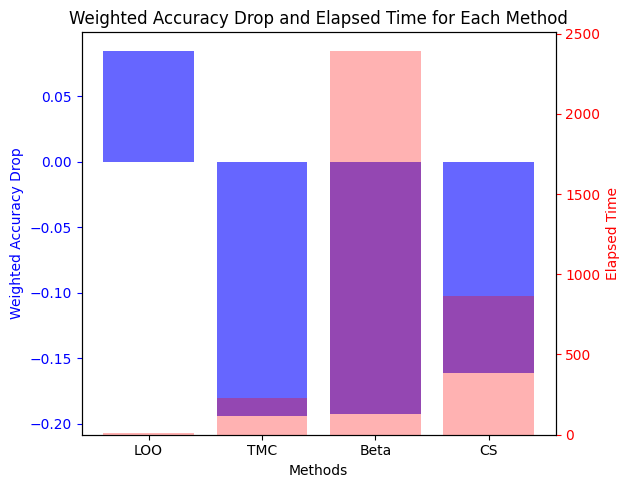

In [11]:
# Plot Weighted Accuracy Drop (res) and Elapsed Time (time) for each method
methods = ['LOO', 'TMC', 'Beta', 'CS']
res_values = [res_loo, res_tmc, res_beta, res_cs]
time_values = [time_loo, time_tmc, time_beta, time_cs]

fig, ax1 = plt.subplots()

# Plotting the weighted accuracy drop on the left y-axis
ax1.bar(methods, res_values, color='b', alpha=0.6, label='Weighted Accuracy Drop')
ax1.set_xlabel('Methods')
ax1.set_ylabel('Weighted Accuracy Drop', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plotting the elapsed time on the right y-axis
ax2.bar(methods, time_values, color='r', alpha=0.3, label='Elapsed Time')
ax2.set_ylabel('Elapsed Time', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Weighted Accuracy Drop and Elapsed Time for Each Method')
plt.show()